## Concordance Testing Between Toil-rnaseq Version 2.0.8 and 3.0.1

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations

import os

I ran 4 samples from EGAD1098 through 2.0.8 via Treehouse, labelled 2.0.8A

Re-ran two of them, labeled 2.0.8B (SJINF012  SJINF053)

Same four samples pulled from the cores run labeled as 3.0.2

In [87]:
!ls /home/root/work/readonly/rcurrie/data/2.0.8A/
!ls /home/root/work/readonly/rcurrie/data/2.0.8B/
!ls /home/root/work/readonly/rcurrie/data/3.0.2/

SJINF012  SJINF015  SJINF053  SJINF062
SJINF012  SJINF053
SJINF012  SJINF015  SJINF053  SJINF062


In [88]:
sample = "SJINF053"

rsem = {}
kallisto = {}
for version in ['2.0.8A', '2.0.8B', '3.0.2']:
    rsem[version] = pd.read_csv(
        "/home/root/work/readonly/rcurrie/data/{}/{}/RSEM/rsem_genes.results".format(version,sample), sep='\t')
    kallisto[version] = pd.read_csv(
        "/home/root/work/readonly/rcurrie/data/{}/{}/Kallisto/abundance.tsv".format(version,sample), sep='\t')

## RSEM 2.0.8 vs. 2.0.8

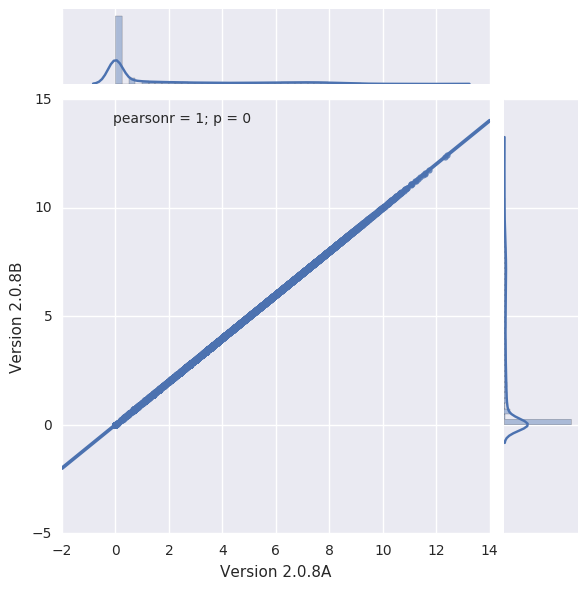

In [89]:
sns.jointplot(rsem['2.0.8A'].expected_count.apply(lambda x: np.log(x+1)),
              rsem['2.0.8B'].expected_count.apply(lambda x: np.log(x+1)), 
              kind='reg')
plt.xlabel('Version 2.0.8A')
plt.ylabel('Version 2.0.8B')

## Kallisto 2.0.8 vs. 2.0.8

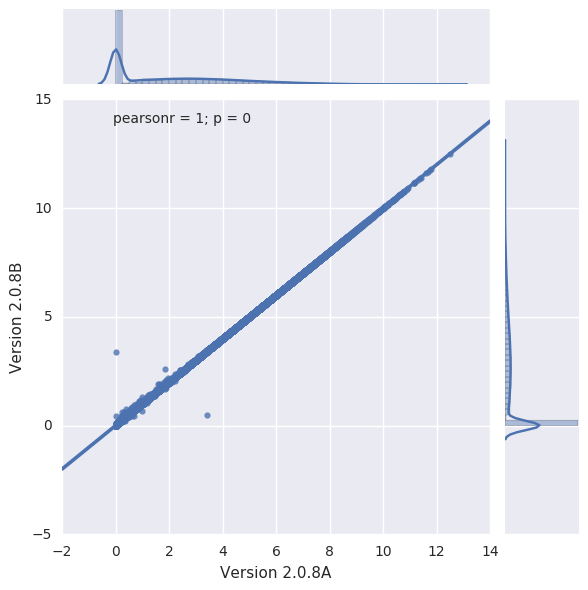

In [90]:
sns.jointplot(kallisto['2.0.8A'].est_counts.apply(lambda x: np.log(x+1)),
              kallisto['2.0.8B'].est_counts.apply(lambda x: np.log(x+1)), 
              kind='reg')
plt.xlabel('Version 2.0.8A')
plt.ylabel('Version 2.0.8B')

## RSEM 2.0.8 vs. 3.0.2

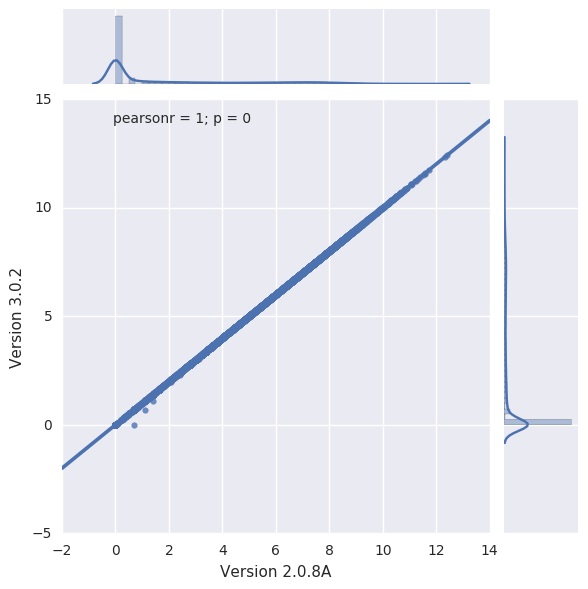

In [91]:
sns.jointplot(rsem['2.0.8A'].expected_count.apply(lambda x: np.log(x+1)),
              rsem['3.0.2'].expected_count.apply(lambda x: np.log(x+1)), 
              kind='reg')
plt.xlabel('Version 2.0.8A')
plt.ylabel('Version 3.0.2')

### Kallisto 2.0.8 vs. 3.0.1

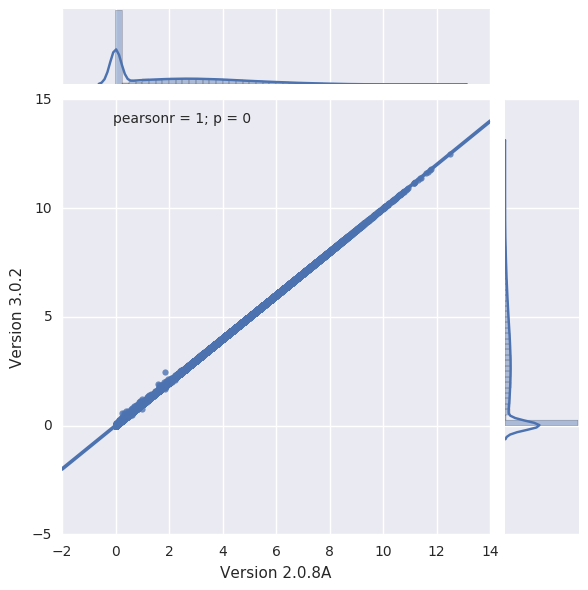

In [92]:
sns.jointplot(kallisto['2.0.8A'].est_counts.apply(lambda x: np.log(x+1)),
              kallisto['3.0.2'].est_counts.apply(lambda x: np.log(x+1)), 
              kind='reg')
plt.xlabel('Version 2.0.8A')
plt.ylabel('Version 3.0.2')

## A Deeper Look

Given the number of genes we're looking at, concordance testing will swallow up minute differences. Instead we'll take the difference between the expected count set and plot that.


In [93]:
for x, y in combinations(['2.0.8A', '2.0.8B'], 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print 'Number of genes: ' + str(len(diff))
    print np.nonzero(diff)

2.0.8A 2.0.8B
Number of genes: 60498
(array([], dtype=int64),)


In [94]:
for x, y in combinations(['2.0.8A', '3.0.2'], 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print 'Number of genes: ' + str(len(diff))
    print np.nonzero(diff)

2.0.8A 3.0.2
Number of genes: 60498
(array([    5,    32,    37, ..., 60203, 60332, 60339]),)
